# SVD
Compute the SVD of a randomly generated (6,3) matrix. Recreate the original matrix from the decomposed elements, and check the L2 norm between the original and recreated matrices.

In [ ]:
import numpy as np

# Initialize a 6x3 matrix with random numbers
X = np.random.rand(6,3)
print(X)

# Compute SVD
U, S, V = np.linalg.svd(X)
print("U:")
print(U)
print("S:")
print(S)
print("V:")
print(V)

# Reconstruct the original matrix
S = np.diag(S)
#pad S with zeros to make it a 6x3 matrix
S = np.pad(S, ((0,3),(0,0)), 'constant')
X_reconstructed = np.matmul(U, np.matmul(S, V))
print("Reconstructed matrix:")

print(X_reconstructed)

# Compute the l2 error between the original and reconstructed matrix
error = np.linalg.norm(X - X_reconstructed)
print("Error:")
print(error)



[[0.16413911 0.62143966 0.73937702]
 [0.72243576 0.1940697  0.11680584]
 [0.35556167 0.18088432 0.44768619]
 [0.05775945 0.54259441 0.77633858]
 [0.77018095 0.64097594 0.67662642]
 [0.01831144 0.17457541 0.921167  ]]
U:
[[-0.46187253 -0.20688365  0.46213144 -0.49587367 -0.53021604  0.05733858]
 [-0.23002532  0.65856452 -0.21285865  0.32505874 -0.51184897  0.31689078]
 [-0.28010056  0.11999519 -0.36863408 -0.0745007  -0.14771807 -0.86248639]
 [-0.43572797 -0.33461137  0.31053461  0.76566397  0.05250312 -0.11290138]
 [-0.55922406  0.42545755  0.1376456  -0.22010066  0.6565239   0.08854421]
 [-0.39078815 -0.46488083 -0.69989756 -0.09060984  0.03578747  0.36307431]]
S:
[2.05097058 0.89138988 0.36496087]
V:
[[-0.3923069  -0.50972325 -0.76568761]
 [ 0.87988238  0.03470983 -0.47392217]
 [-0.26814604  0.85963797 -0.4348796 ]]
Reconstructed matrix:
[[0.16413911 0.62143966 0.73937702]
 [0.72243576 0.1940697  0.11680584]
 [0.35556167 0.18088432 0.44768619]
 [0.05775945 0.54259441 0.77633858]
 [0.

# Economy SVD

In [ ]:


# Economy SVD
print("Economy SVD")
U, S, V = np.linalg.svd(X, full_matrices=False)
print("U:")
print(U)
print("S:")
print(S)
print("V:")
print(V)

# Reconstruct the original matrix
S = np.diag(S)
X_reconstructed = np.matmul(U, np.matmul(S, V))
print("Reconstructed matrix:")
print(X_reconstructed)

# Compute the l2 error between the original and reconstructed matrix
error = np.linalg.norm(X - X_reconstructed)
print("Error:")
print(error)

Economy SVD
U:
[[-0.46187253 -0.20688365  0.46213144]
 [-0.23002532  0.65856452 -0.21285865]
 [-0.28010056  0.11999519 -0.36863408]
 [-0.43572797 -0.33461137  0.31053461]
 [-0.55922406  0.42545755  0.1376456 ]
 [-0.39078815 -0.46488083 -0.69989756]]
S:
[2.05097058 0.89138988 0.36496087]
V:
[[-0.3923069  -0.50972325 -0.76568761]
 [ 0.87988238  0.03470983 -0.47392217]
 [-0.26814604  0.85963797 -0.4348796 ]]
Reconstructed matrix:
[[0.16413911 0.62143966 0.73937702]
 [0.72243576 0.1940697  0.11680584]
 [0.35556167 0.18088432 0.44768619]
 [0.05775945 0.54259441 0.77633858]
 [0.77018095 0.64097594 0.67662642]
 [0.01831144 0.17457541 0.921167  ]]
Error:
1.1869565714750783e-15


# Low-rank SVD


In [ ]:
U, S, V = np.linalg.svd(X, full_matrices=False)

rank = 3
U = U[:, 0:rank]
S = np.diag(S[0:rank])
V = V[0:rank, :]
X_reconstructed = np.matmul(U, np.matmul(S, V))
print("Reconstructed matrix:")
print(X_reconstructed)

# Compute the l2 error between the original and reconstructed matrix
error = np.linalg.norm(X - X_reconstructed)
print("Error:")
print(error)

Reconstructed matrix:
[[0.16413911 0.62143966 0.73937702]
 [0.72243576 0.1940697  0.11680584]
 [0.35556167 0.18088432 0.44768619]
 [0.05775945 0.54259441 0.77633858]
 [0.77018095 0.64097594 0.67662642]
 [0.01831144 0.17457541 0.921167  ]]
Error:
1.1869565714750783e-15


# Image Compression with SVD

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os

Image shape before:
(2731, 4111, 3)
Image shape after:
(2731, 4111)


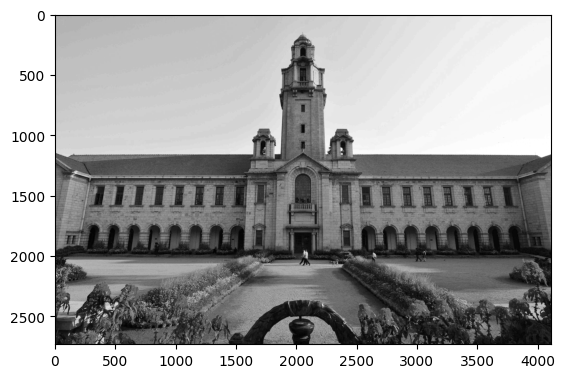

In [ ]:
# Load the image
img = imread("/home/iisc.jpeg")
print("Image shape before:")
print(img.shape)

img = np.mean(img, axis=2)
plt.imshow(img, cmap='gray')

print("Image shape after:")
print(img.shape)



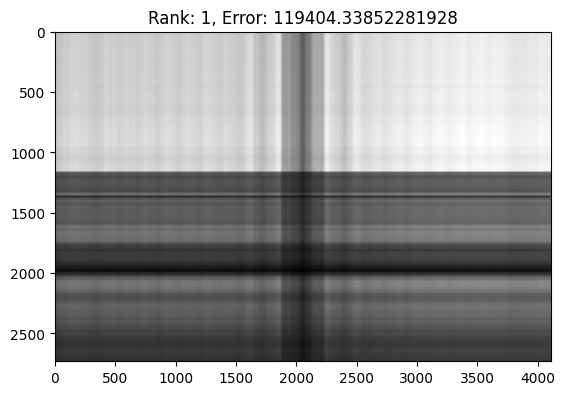

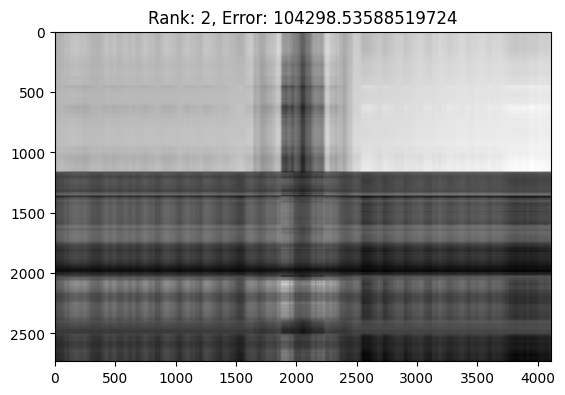

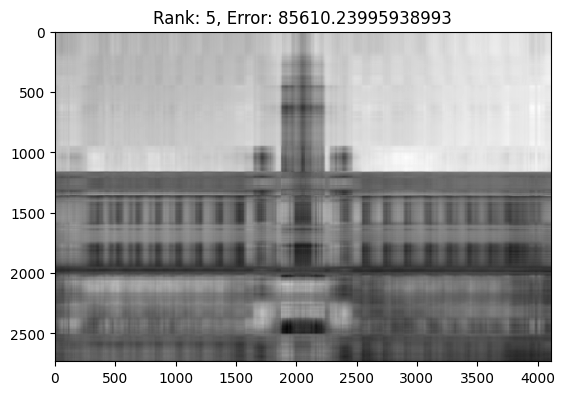

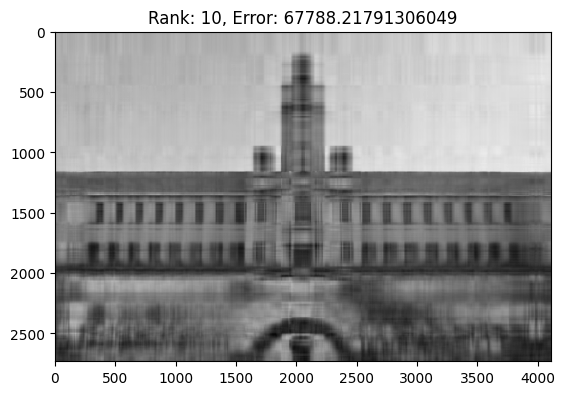

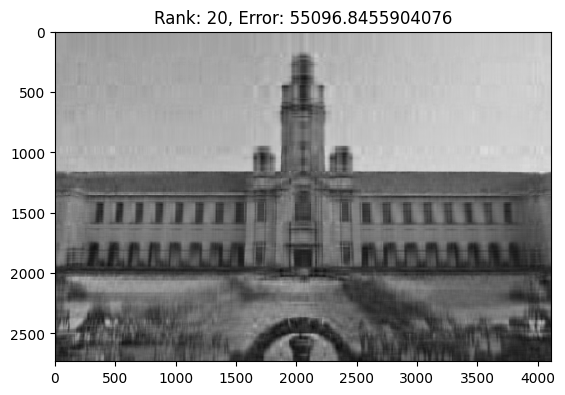

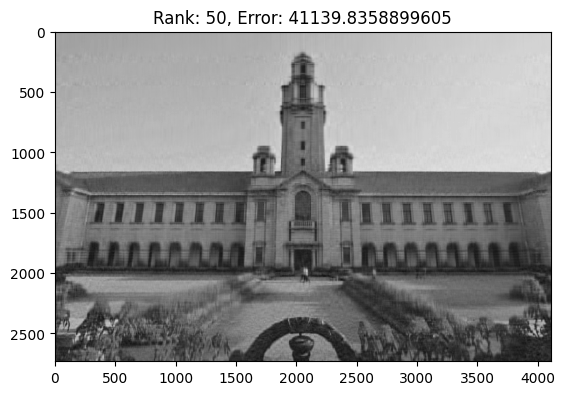

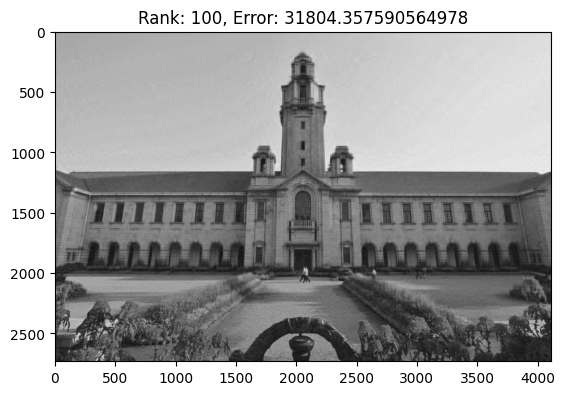

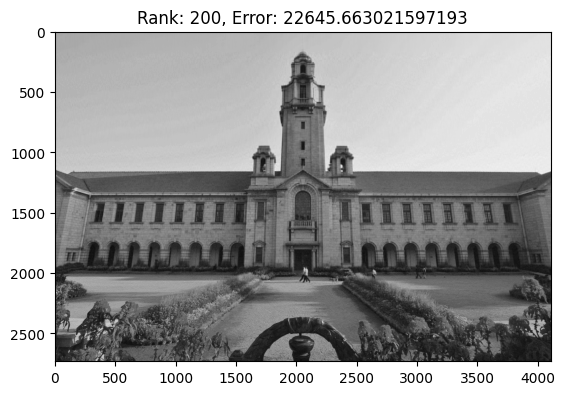

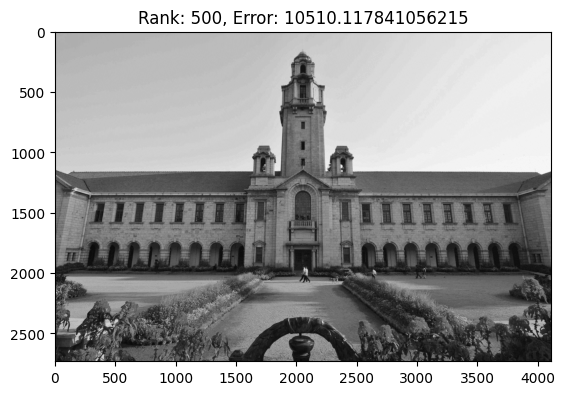

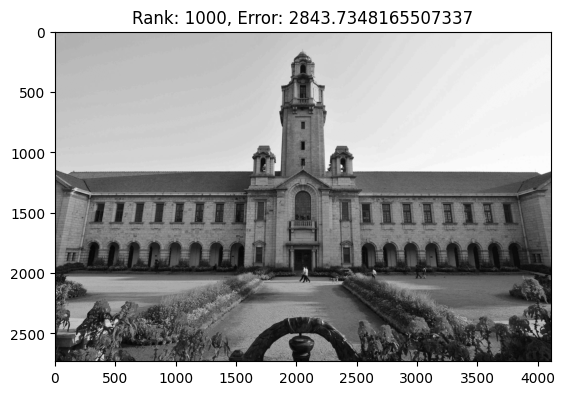

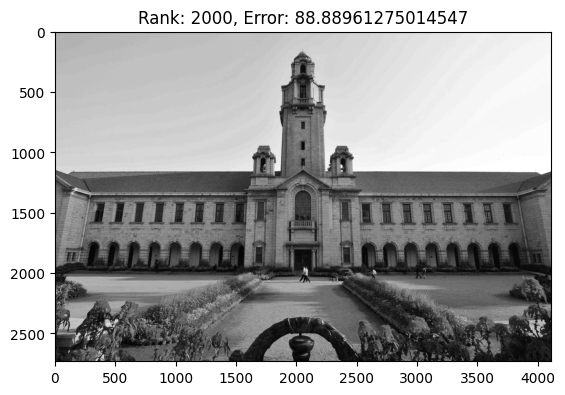

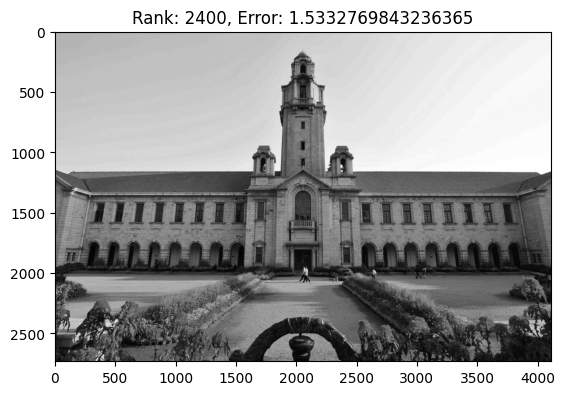

In [ ]:
U, S, V = np.linalg.svd(img, full_matrices=False)

rank_list = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 2400]
error_list = []

for rank in rank_list:
    U_r = U[:, 0:rank]
    S_r = np.diag(S[0:rank])
    V_r = V[0:rank, :]
    img_reconstructed = np.matmul(U_r, np.matmul(S_r, V_r))
    error = np.linalg.norm(img - img_reconstructed)
    error_list.append(error)
    plt.figure()
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title("Rank: " + str(rank) + ", Error: " + str(error))
    plt.show()
    plt.close()

# Error vs rank

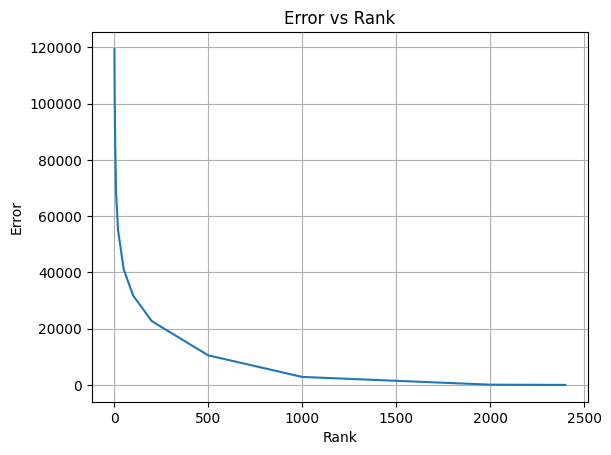

In [ ]:
# plot error vs rank
plt.figure()
plt.plot(rank_list, error_list)
plt.xlabel("Rank")
plt.ylabel("Error")
plt.title("Error vs Rank")
plt.grid()
plt.show()

# Energy vs rank


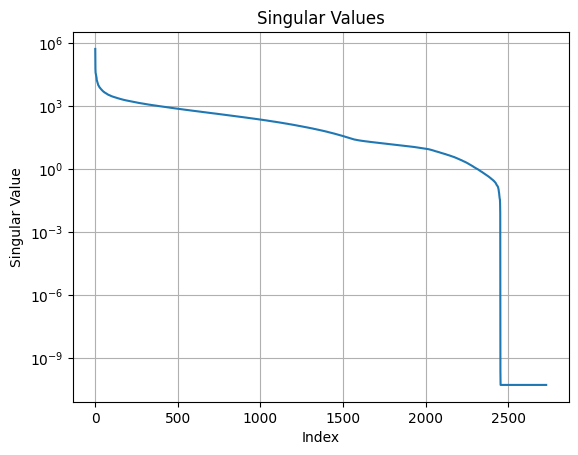

In [ ]:
# plot singular values
plt.figure()
plt.plot(S)
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.title("Singular Values")
plt.yscale('log')
plt.grid()
plt.show()


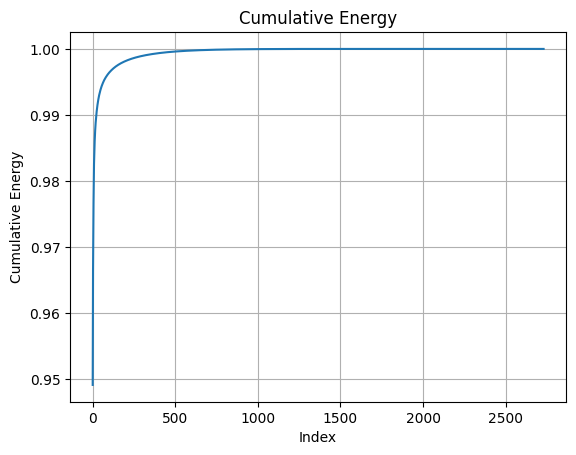

In [ ]:
# plot cumulative energy
cumulative_energy = np.cumsum(S**2) / np.sum(S**2)
plt.figure()
plt.plot(cumulative_energy)
plt.xlabel("Index")
plt.ylabel("Cumulative Energy")
plt.title("Cumulative Energy")
plt.grid()
plt.show()